# Ejercicio 1.1: El Entorno y el Agente Reactivo

## Smart Warehouse - Agente Reactivo Simple

En este ejercicio implementaremos:
1. **Environment**: Cuadrícula NxN con suciedad y obstáculos
2. **ReflexAgent**: Agente reactivo que puede moverse y limpiar

In [49]:
import numpy as np
import random
import matplotlib.pyplot as plt
from typing import List, Tuple, Optional

## Clase Environment

Representa el entorno de la bodega con:
- Cuadrícula NxN
- Suciedad (Dirt): 'D'
- Obstáculos (Wall): 'W'
- Espacio vacío: '.'
- Posición del agente: 'A'

In [50]:
class Environment:
    def __init__(self, size: int = 5, num_dirt: int = 5, num_walls: int = 3):
        self.size = size
        self.grid = [['.'] * size for _ in range(size)]
        self.agent_position = (0, 0)
        self._generate_environment(num_dirt, num_walls)
    
    def _generate_environment(self, num_dirt: int, num_walls: int):
        positions = []
        for i in range(self.size):
            for j in range(self.size):
                if (i, j) != (0, 0):
                    positions.append((i, j))
        
        random.shuffle(positions)
        
        for i in range(min(num_walls, len(positions))):
            x, y = positions[i]
            self.grid[x][y] = 'W'
        
        for i in range(num_walls, min(num_walls + num_dirt, len(positions))):
            x, y = positions[i]
            self.grid[x][y] = 'D'
    
    def get_cell(self, x: int, y: int):
        if 0 <= x < self.size and 0 <= y < self.size:
            return self.grid[x][y]
        return None
    
    def move_agent(self, new_x: int, new_y: int):
        if 0 <= new_x < self.size and 0 <= new_y < self.size and self.grid[new_x][new_y] != 'W':
            self.agent_position = (new_x, new_y)
            return True
        return False
    
    def clean(self):
        x, y = self.agent_position
        if self.grid[x][y] == 'D':
            self.grid[x][y] = '.'
            return True
        return False
    
    def display(self):
        print("\n" + "="*30)
        for i in range(self.size):
            row = ""
            for j in range(self.size):
                if (i, j) == self.agent_position:
                    row += " A "
                else:
                    row += f" {self.grid[i][j]} "
            print(row)
        print("="*30)

## Clase ReflexAgent

Agente reactivo simple que:
1. Percibe su entorno inmediato
2. Toma decisiones basadas en reglas simples (condición-acción)
3. Ejecuta acciones: UP, DOWN, LEFT, RIGHT, CLEAN, IDLE

In [51]:
class ReflexAgent:
    def __init__(self, environment: Environment):
        self.env = environment
        self.cleaned_count = 0
        self.history = []
    
    def get_percepts(self):
        """Obtiene las percepciones actuales del entorno."""
        x, y = self.env.agent_position
        return {
            'current_cell': self.env.grid[x][y],
            'position': self.env.agent_position,
            'adjacent_cells': {
                'UP': self.env.get_cell(x-1, y),
                'DOWN': self.env.get_cell(x+1, y),
                'LEFT': self.env.get_cell(x, y-1),
                'RIGHT': self.env.get_cell(x, y+1)
            }
        }
    
    def reflex_agent_program(self, percepts):
        """
        Funcion de decision del agente reactivo.
        
        Args:
            percepts: Diccionario con informacion actual
                      - 'current_cell': estado de la celda actual
                      - 'position': tupla (x, y) con ubicacion
                      - 'adjacent_cells': dict con celdas adyacentes
        
        Returns:
            Una accion de la lista: ['UP', 'DOWN', 'LEFT', 'RIGHT', 'CLEAN', 'IDLE']
        """
        
        # Regla 1: Si la celda actual esta sucia -> CLEAN
        if percepts['current_cell'] == 'D':
            return 'CLEAN'
        
        # Regla 2: Si hay obstaculo, cambiar direccion (buscar direcciones validas)
        valid_moves = []
        for direction, cell in percepts['adjacent_cells'].items():
            if cell is not None and cell != 'W':
                valid_moves.append(direction)
        
        # Si no hay movimientos validos -> IDLE
        if not valid_moves:
            return 'IDLE'
        
        # Regla 3: De lo contrario, moverse (elegir direccion)
        # Priorizar moverse hacia suciedad
        for direction in valid_moves:
            if percepts['adjacent_cells'][direction] == 'D':
                return direction
        
        # Movimiento aleatorio si no hay suciedad cerca
        return random.choice(valid_moves)
    
    def decide_action(self):
        """Decide la accion usando reflex_agent_program."""
        percepts = self.get_percepts()
        return self.reflex_agent_program(percepts)
    
    def execute_action(self, action):
        x, y = self.env.agent_position
        
        if action == 'CLEAN':
            if self.env.clean():
                self.cleaned_count += 1
                return True
        elif action == 'UP':
            return self.env.move_agent(x-1, y)
        elif action == 'DOWN':
            return self.env.move_agent(x+1, y)
        elif action == 'LEFT':
            return self.env.move_agent(x, y-1)
        elif action == 'RIGHT':
            return self.env.move_agent(x, y+1)
        
        return False
    
    def run(self, max_steps: int = 20):
        print("="*50)
        print("SIMULACION DEL AGENTE REACTIVO")
        print("="*50)
        self.env.display()
        
        for step in range(max_steps):
            action = self.decide_action()
            self.execute_action(action)
            
            self.history.append({
                'step': step + 1,
                'action': action,
                'position': self.env.agent_position,
                'cleaned_total': self.cleaned_count
            })
            
            print(f"\nPaso {step + 1}: Accion={action} | Posicion={self.env.agent_position} | Limpiadas={self.cleaned_count}")
        
        print("\n" + "="*50)
        print(f"SIMULACION COMPLETADA")
        print(f"Total de suciedad limpiada: {self.cleaned_count}")
        print("="*50)
        self.env.display()

## Prueba del Sistema

Ahora vamos a probar el entorno y el agente reactivo.

In [63]:
# Crear el entorno
env = Environment(size=5, num_dirt=6, num_walls=4)

# Crear el agente
agent = ReflexAgent(env)

# Ejecutar la simulacion de 20 pasos
agent.run(max_steps=20)

SIMULACION DEL AGENTE REACTIVO

 A  D  .  D  . 
 D  .  W  .  D 
 .  .  .  .  . 
 W  .  .  W  W 
 D  .  .  .  D 

Paso 1: Accion=DOWN | Posicion=(1, 0) | Limpiadas=0

Paso 2: Accion=CLEAN | Posicion=(1, 0) | Limpiadas=1

Paso 3: Accion=UP | Posicion=(0, 0) | Limpiadas=1

Paso 4: Accion=RIGHT | Posicion=(0, 1) | Limpiadas=1

Paso 5: Accion=CLEAN | Posicion=(0, 1) | Limpiadas=2

Paso 6: Accion=LEFT | Posicion=(0, 0) | Limpiadas=2

Paso 7: Accion=RIGHT | Posicion=(0, 1) | Limpiadas=2

Paso 8: Accion=RIGHT | Posicion=(0, 2) | Limpiadas=2

Paso 9: Accion=RIGHT | Posicion=(0, 3) | Limpiadas=2

Paso 10: Accion=CLEAN | Posicion=(0, 3) | Limpiadas=3

Paso 11: Accion=RIGHT | Posicion=(0, 4) | Limpiadas=3

Paso 12: Accion=DOWN | Posicion=(1, 4) | Limpiadas=3

Paso 13: Accion=CLEAN | Posicion=(1, 4) | Limpiadas=4

Paso 14: Accion=LEFT | Posicion=(1, 3) | Limpiadas=4

Paso 15: Accion=UP | Posicion=(0, 3) | Limpiadas=4

Paso 16: Accion=RIGHT | Posicion=(0, 4) | Limpiadas=4

Paso 17: Accion=LEFT | Pos

## Análisis PEAS

Para el agente de limpieza de bodega:

### Performance (Medida de Desempeño)
- Número de casillas limpias
- Eficiencia (casillas limpias / acciones tomadas)
- Cobertura del espacio explorado

### Environment (Entorno)
- Cuadrícula NxN
- Suciedad distribuida aleatoriamente
- Obstáculos (paredes)
- Observable parcialmente (solo percepciones locales)
- Determinístico
- Episódico
- Estático
- Discreto

### Actuators (Actuadores)
- Motor de movimiento: UP, DOWN, LEFT, RIGHT
- Sistema de limpieza: CLEAN
- Sistema de espera: IDLE

### Sensors (Sensores)
- Sensor de posición (GPS interno)
- Sensor de contenido de celda actual
- Sensores de proximidad (celdas adyacentes)

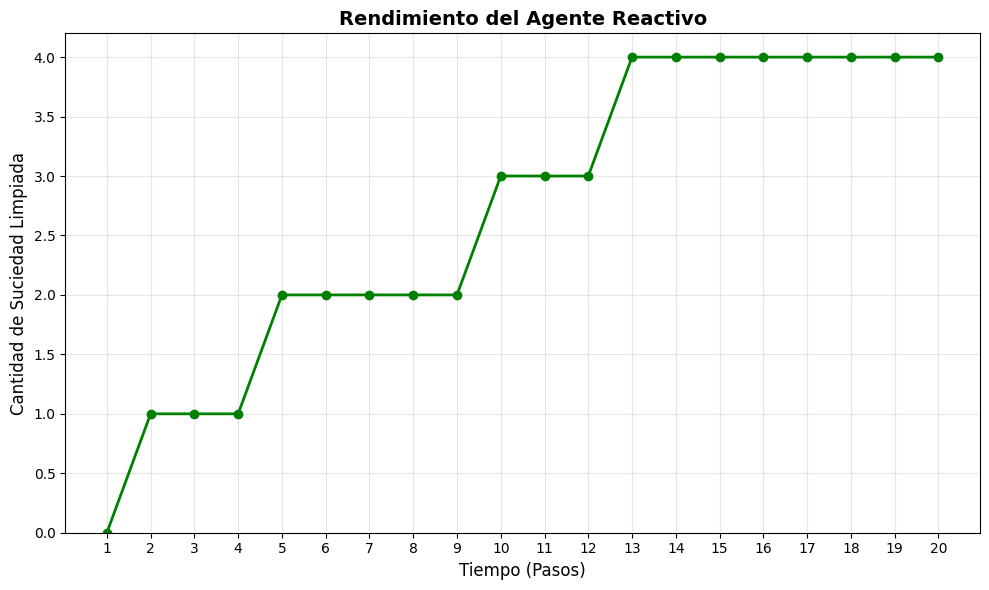


Rendimiento final: 4 casillas limpiadas en 20 pasos
Eficiencia: 0.20 limpiezas por paso


In [64]:
# Extraer datos del historial
steps = [h['step'] for h in agent.history]
cleaned = [h['cleaned_total'] for h in agent.history]

# Crear grafica
plt.figure(figsize=(10, 6))
plt.plot(steps, cleaned, marker='o', linewidth=2, markersize=6, color='green')
plt.xlabel('Tiempo (Pasos)', fontsize=12)
plt.ylabel('Cantidad de Suciedad Limpiada', fontsize=12)
plt.title('Rendimiento del Agente Reactivo', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(steps)
plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

print(f"\nRendimiento final: {agent.cleaned_count} casillas limpiadas en {len(steps)} pasos")
print(f"Eficiencia: {agent.cleaned_count/len(steps):.2f} limpiezas por paso")